# Hobo data analysis

This notebook shows how to analyse **HOBO data**.

It does the following:

1. Loads the data
2. Analyses the data

## Import modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import pandas as pd

## Read in the data

Choose a filename:

In [2]:
filename=r'sensor2_ben.csv'

Reads in the data into a Pandas DataFrame and parses the dates and times to a pd.Timestamp:

In [3]:
df=pd.read_csv(filename,skiprows=1,parse_dates=['Date Time, GMT+00:00'])
df.head()

,#,"Date Time, GMT+00:00","Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)",Host Connected (LGR S/N: 10456880),Coupler Attached (LGR S/N: 10456880),Stopped (LGR S/N: 10456880),End Of File (LGR S/N: 10456880)
0,1,2014-02-25 07:00:00,68.077,NaN,NaN,NaN,NaN
1,2,2014-02-25 07:30:00,67.906,NaN,NaN,NaN,NaN
2,3,2014-02-25 08:00:00,67.906,NaN,NaN,NaN,NaN
3,4,2014-02-25 08:30:00,68.077,NaN,NaN,NaN,NaN
4,5,2014-02-25 09:00:00,68.421,NaN,NaN,NaN,NaN


Cleaned the data including:
1. removed unecessary coloumns and renamed columns
2. converted Farenheit to Celsius
3. set the index to 'datetime'
4. saved as a csv file

In [4]:
df1=df[['Date Time, GMT+00:00','Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)']].copy()
df1=df1.rename(columns={'Date Time, GMT+00:00':'DateTime',
                        'Temp, °F (LGR S/N: 10456880, SEN S/N: 10456880)':'Temp'})
df1['Temp']=(df1['Temp']-32)*5/9
df1=df1.set_index('DateTime')
df1.to_csv('NewTable.csv')
df1.head()

,Temp
DateTime,
2014-02-25 07:00:00,20.042778
2014-02-25 07:30:00,19.947778
2014-02-25 08:00:00,19.947778
2014-02-25 08:30:00,20.042778
2014-02-25 09:00:00,20.233889


PLOT_FILENAME: test.png


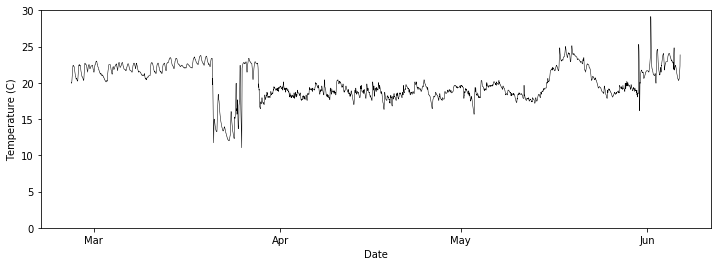

In [5]:
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(12,4))
ax.plot(df1,color='black',linewidth=0.5)
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylim([0,30])
ax.set_ylabel('Temperature (C)')
plot_filename=r'test.png'
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Create a function to filter by date and times

In [6]:
def filter_by_dates(df,start_date,end_date):
    """Filters the dataframe df by start_date and end_date
    
    Arguments:
        - df (pd.Dataframe): a pandas dataframe with a datetime index
        - start_date (str): start date in format 'YYYY-MM-DD hh:mm:ss'
        - end_date (str): end date in format 'YYYY-MM-DD hh:mm:ss'
        
    Returns:
        pd.DataFrame
    
    """
    
    mask=df.index>=pd.Timestamp(start_date)
    df2=df[mask]
    mask=df2.index<pd.Timestamp(end_date)
    df2=df2[mask]
    
    return df2

In [7]:
filter_by_dates(df1,'2014-03-28 00:00:00','2014-03-29 00:00:00').head(2)

,Temp
DateTime,
2014-03-28 00:00:00,22.717222
2014-03-28 00:30:00,22.717222


In [13]:
df1.loc['2014-03-28 12:00:00':'2014-03-29']

,Temp
DateTime,
2014-03-28 12:00:00,19.092222
2014-03-28 12:30:00,17.950000
2014-03-28 13:00:00,16.998889
2014-03-28 13:30:00,16.902778
2014-03-28 14:00:00,16.712778
2014-03-28 14:30:00,16.712778
2014-03-28 15:00:00,16.617778
2014-03-28 15:30:00,16.522778
2014-03-28 16:00:00,16.522778


## Plot a day graph

PLOT_FILENAME: test.png


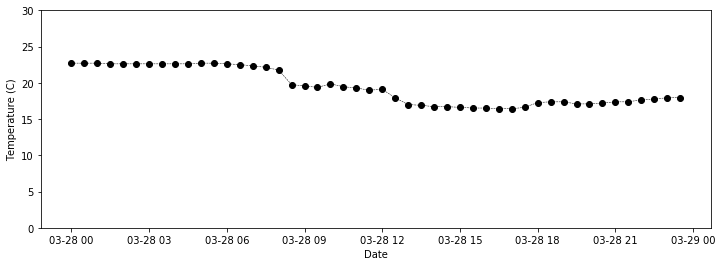

In [8]:
df2=filter_by_dates(df1,'2014-03-28 00:00:00','2014-03-29 00:00:00')
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(12,4))
ax.plot(df2,'o--',color='black',linewidth=0.5)
ax.set_xlabel('Date')
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylim([0,30])
ax.set_ylabel('Temperature (C)')
plot_filename=r'test.png'
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Statistics

In [18]:
df2=df1.loc['2014-03-23 00:00:00':'2014-03-29'].describe()
df2.to_csv('Stats.csv')
df2

,Temp
count,336.000000
mean,18.437603
std,3.825140
min,11.041111
25%,15.472778
50%,18.092500
75%,22.621111
max,23.387778
